<b>All about Topic Modeling</b>

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import emoji
import re
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
import tqdm

In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aafre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
pd.set_option('display.max_colwidth', 0)

<b>Loading dataset</b>

In [49]:
df = pd.read_csv(r'C:\Users\aafre\OneDrive\Documents\kagglecompetition\vaccination_all_tweets.csv')

<b></b>

<b>Exploratory Data Analysis</b>

In [50]:
df.shape

(211346, 16)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211346 entries, 0 to 211345
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                211346 non-null  int64 
 1   user_name         211345 non-null  object
 2   user_location     148993 non-null  object
 3   user_description  196081 non-null  object
 4   user_created      211346 non-null  object
 5   user_followers    211346 non-null  int64 
 6   user_friends      211346 non-null  int64 
 7   user_favourites   211346 non-null  int64 
 8   user_verified     211346 non-null  bool  
 9   date              211346 non-null  object
 10  text              211346 non-null  object
 11  hashtags          164458 non-null  object
 12  source            211227 non-null  object
 13  retweets          211346 non-null  int64 
 14  favorites         211346 non-null  int64 
 15  is_retweet        211346 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [52]:
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [53]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.113460e+05,2.113460e+05,211346.000000,2.113460e+05,211346.000000,211346.000000
mean,1.403519e+18,9.322111e+04,980.733962,1.190420e+04,2.393208,10.314380
std,2.633745e+16,8.180458e+05,5352.087553,3.871351e+04,44.647117,160.674994
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.380895e+18,5.700000e+01,25.000000,5.700000e+01,0.000000,0.000000
50%,1.405847e+18,3.340000e+02,226.000000,9.510000e+02,0.000000,0.000000
75%,1.423698e+18,1.513000e+03,785.000000,7.115000e+03,0.000000,2.000000
max,1.451288e+18,1.621817e+07,582461.000000,1.221784e+06,11288.000000,25724.000000


<b>missing data</b>

<AxesSubplot:>

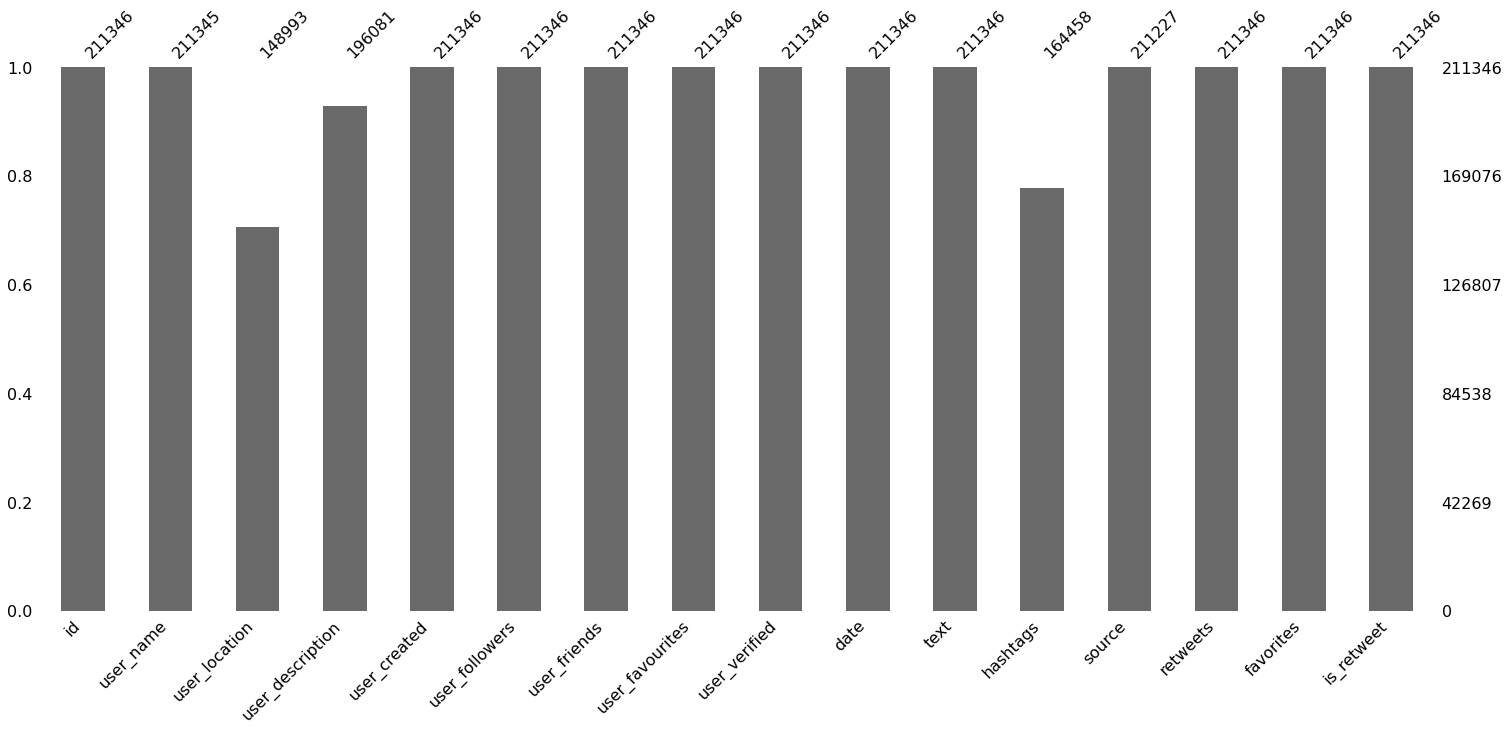

In [54]:
msno.bar(df)

<Figure size 720x720 with 0 Axes>

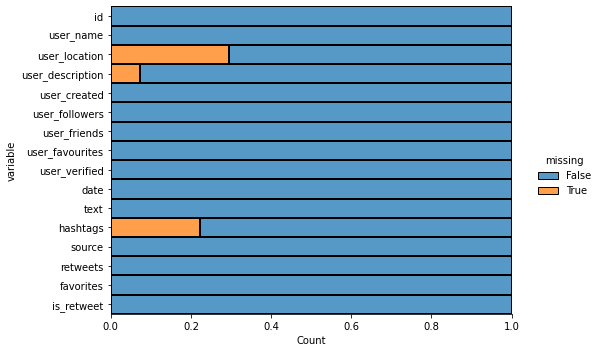

In [55]:
plt.figure(figsize=(10,10))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect = 1.50
)

In [56]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [57]:
missing_data(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,1,62353,15265,0,0,0,0,0,0,0,46888,119,0,0,0
Percent,0,0.000473158,29.5028,7.22275,0,0,0,0,0,0,0,22.1854,0.0563058,0,0,0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


As seen in the above missing value analysis: user location, user description and hashtags are having misssing values

<b>EDA</b>

<AxesSubplot:xlabel='source', ylabel='count'>

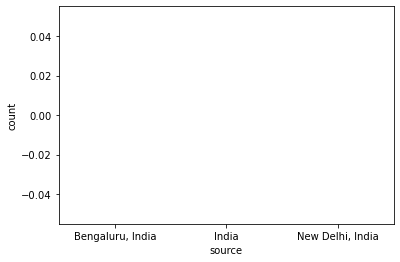

In [58]:
sns.countplot(x = 'source', data = df, palette = 'mako', order=df.user_location.value_counts().iloc[:3].index)

In [59]:
def eda_features(feature):
    fig = plt.figure(figsize = (15, 10))

    plt.title("Top 20 User Locations", y = 1.0, size = 15, fontname = 'monospace', color = 'black')
    a = sns.countplot(x = feature, data = df, palette = 'mako', order=df[feature].value_counts().iloc[:20].index)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace', size = 12, rotation= 90)
    plt.yticks([])
    for j in ['right', 'top']:
        a.spines[j].set_visible(False)
    for j in ['bottom', 'left']:    
        a.spines[j].set_linewidth(1.2)

    summ = 0
    for p in a.patches:
        summ += p.get_height()

    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{height}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 13,
                   xytext = (1, -15), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'white')
        a.annotate(f'{round((height/summ) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 15,
                   xytext = (1, 13), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')   


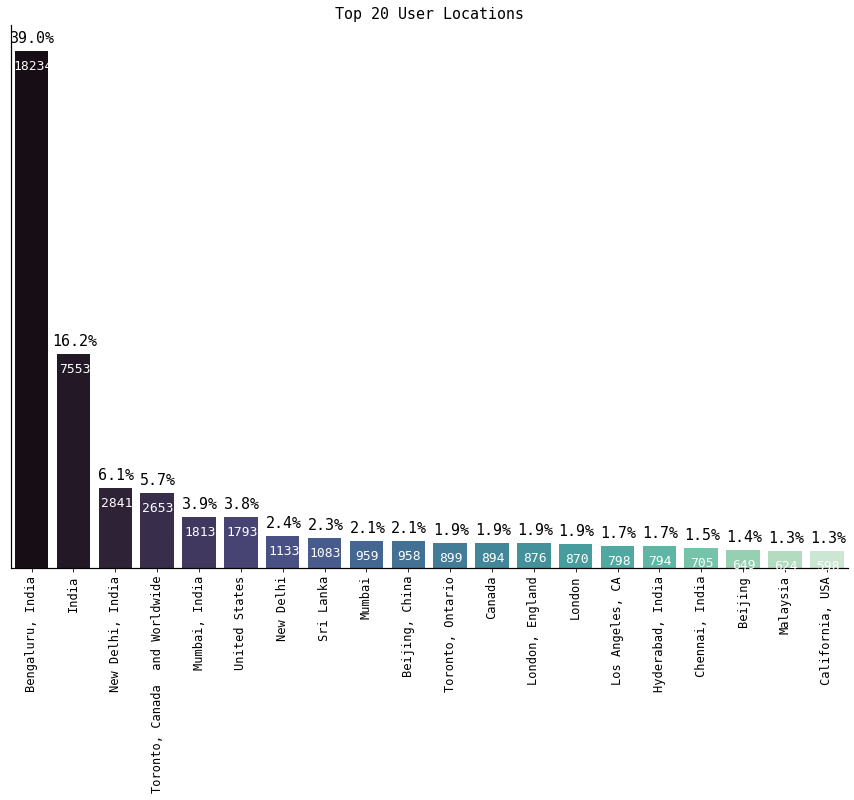

In [60]:
eda_features('user_location')

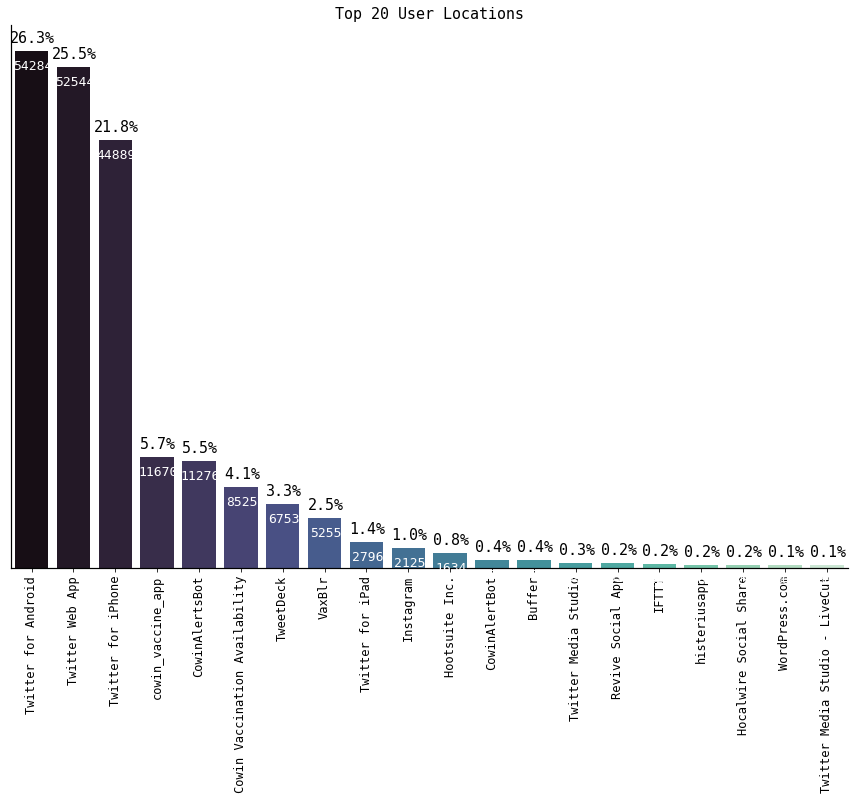

In [61]:
eda_features('source')

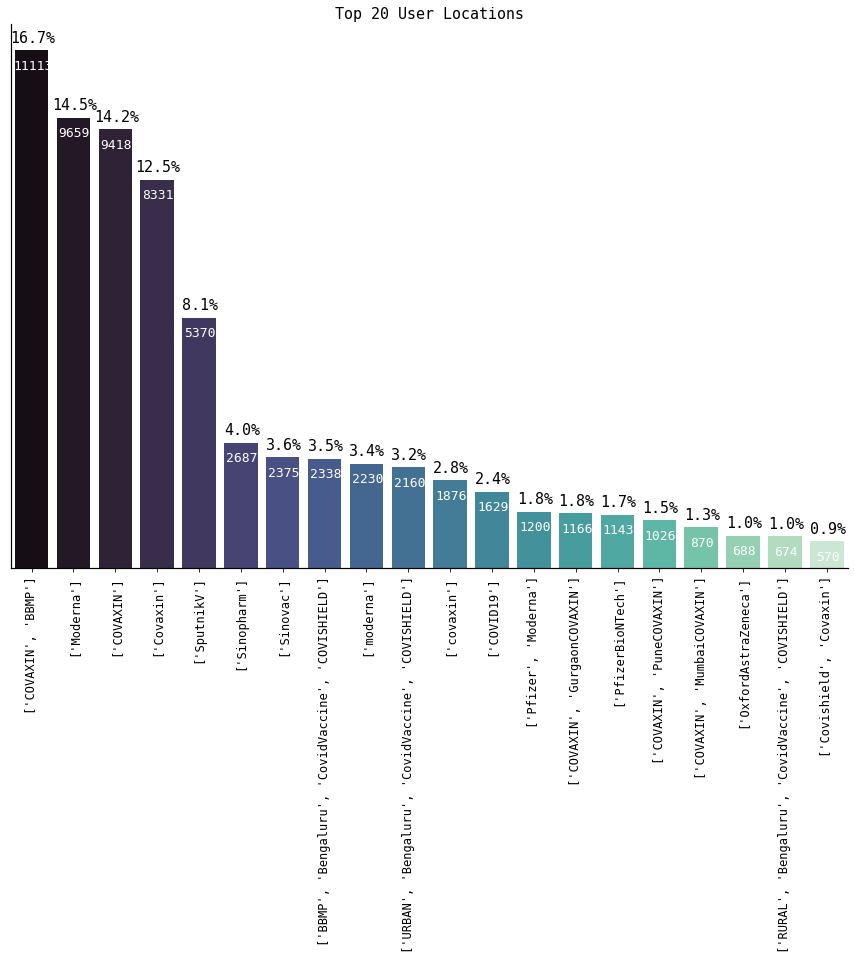

In [62]:
eda_features('hashtags')

<b>word clouds</b>

In [63]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

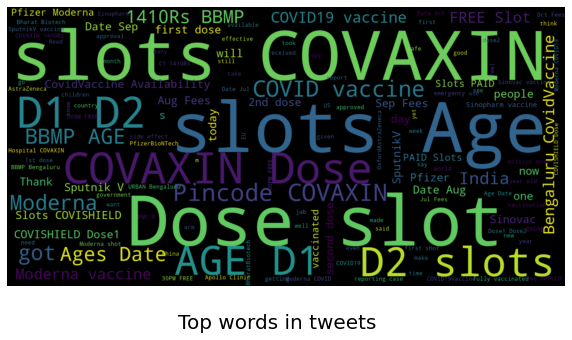

In [64]:
show_wordcloud(df['text'], title = 'Top words in tweets')

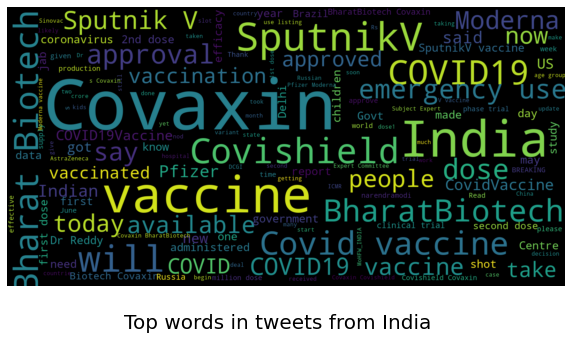

In [65]:
india_df = df.loc[df.user_location == 'India']
show_wordcloud(india_df['text'], title = 'Top words in tweets from India')

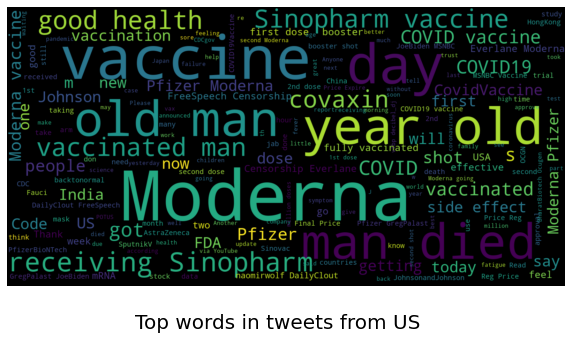

In [66]:
us_df = df.loc[df.user_location == 'United States']
show_wordcloud(us_df['text'], title = 'Top words in tweets from US')

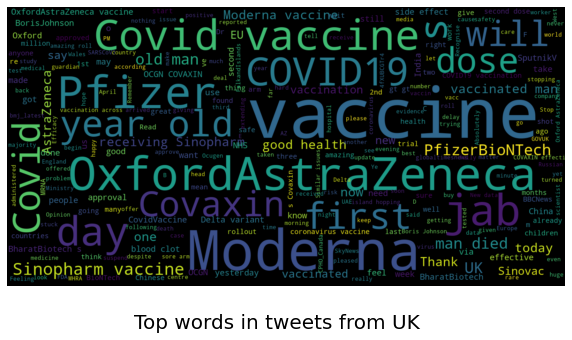

In [67]:
uk_df = df.loc[df.user_location == 'United Kingdom']
show_wordcloud(uk_df['text'], title = 'Top words in tweets from UK')

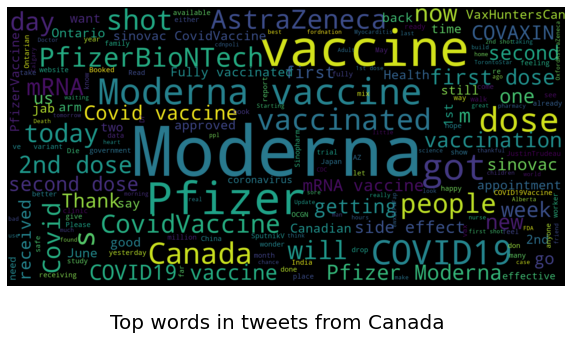

In [68]:
canada_df = df.loc[df.user_location == 'Canada']
show_wordcloud(canada_df['text'], title = 'Top words in tweets from Canada')

<b>Hashtag Analysis</b>

We will find hashtag analysis per tweet

In [69]:
def feature_plot_dist(features, title, data, isLog=False):
    
    plt.figure(figsize = (12, 6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()
    

In [70]:
df['hashtags']= df['hashtags'].replace(np.nan, "['None']", regex= True)
df['hashtags'] = df['hashtags'].apply(lambda x: x.replace('\\N',''))
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))

In [71]:
df['hashtags_count']

0         1
1         1
2         6
3         1
4         2
         ..
211341    4
211342    2
211343    5
211344    4
211345    4
Name: hashtags_count, Length: 211346, dtype: int64

C:\Users\aafre\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


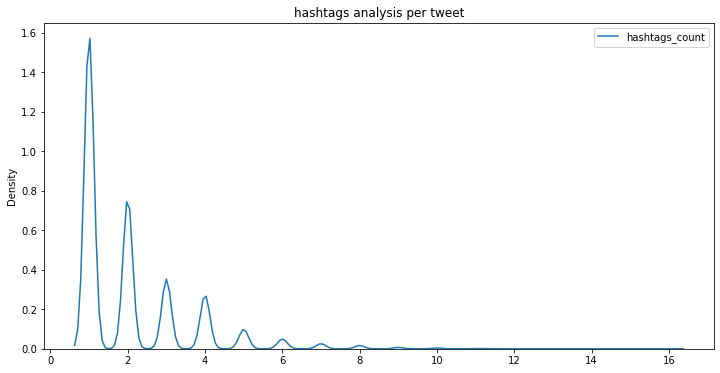

In [72]:
feature_plot_dist(['hashtags_count'], "hashtags analysis per tweet", df)

In [73]:
df['hashtags_individual'] = df['hashtags'].apply(lambda x: x.split(','))

In [74]:
df['hashtags_individual']

0         [['PfizerBioNTech']]                                                                      
1         [['None']]                                                                                
2         [['coronavirus',  'SputnikV',  'AstraZeneca',  'PfizerBioNTech',  'Moderna',  'Covid_19']]
3         [['None']]                                                                                
4         [['whereareallthesickpeople',  'PfizerBioNTech']]                                         
                                ...                                                                 
211341    [['URBAN',  'Bengaluru',  'CovidVaccine',  'COVISHIELD']]                                 
211342    [['SputnikV',  'PANACEA']]                                                                
211343    [['NitrileGloves',  'FaceMasks',  'Vaccines',  'SputnikV',  'syringes']]                  
211344    [['BBMP',  'Bengaluru',  'CovidVaccine',  'COVISHIELD']]                         

In [75]:
from itertools import chain
all_hashtags = set(chain.from_iterable(list(df['hashtags_individual'])))

In [76]:
print(f"There are totally: {len(all_hashtags)}")

There are totally: 40247


<h3>Topic Modeling</h3>

<b>Data Cleaning and Pre-processnig with SpaCy</b>

we would clean pre-processing "Text" from the data

In [77]:
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@' 

In [78]:
def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

def remove_hashtags(text):
    """Takes a string and removes any hash tags"""
    text = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', text)  # remove hash tags
    return text

def remove_users(text):
    """Takes a string and removes retweet and @user information"""
    #tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)  # remove tweeted at
    return text

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
df['emoji_free_tweets'] = df['text'].apply(call_emoji_free)

#Create a new column with url free tweets
df['url_free_tweets'] = df['emoji_free_tweets'].apply(url_free_text)

# create a new column with hashtags free tweets
df['hashtags_free_tweets'] = df['url_free_tweets'].apply(remove_hashtags)

# create a new column with user free tweets. 
df['user_free_tweets'] = df['hashtags_free_tweets'].apply(remove_users)

In [80]:
def clean_text_more(text):
    #remove punctuation
    
    text = re.sub('[' + punctuation + ']+', ' ', text)
    
    # remove double spacing
    text = re.sub('\s+', ' ', text)  
    
    # remove numbers
    text = re.sub('([0-9]+)', '', text)
    
    # convert to lower case
    text = text.lower()
    
    # remove leading and trailing spaces 
    text = text.strip()
    
    # removing '...' characters from the text
    text = re.sub('…', '', text)
           
    return text
#create a new column with more cleaned tweets. 
df['cleaned_tweet'] = df['user_free_tweets'].apply(clean_text_more)

In [135]:
df['cleaned_tweet'][0]

'same folks said daikon paste could treat a cytokine storm'

In [175]:
def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

In [176]:
#stops words removal, tokenization and lemmatization using spacy
nlp = spacy.load('en_core_web_sm')

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)
tokens = []
for doc in tokenizer.pipe(df['cleaned_tweet'], batch_size=500):
    doc_tokens = []  
    for token in doc: 
        if not token.is_stop and len(token) >2:
            doc_tokens.append(lemmatize(token.text))
            
    tokens.append(doc_tokens)
    
# build bigram and trigram models
bigram = Phrases(tokens, min_count=5)
trigram = Phrases(bigram[tokens])   

# Makes lemma tokens column
df['lemmas'] = tokens

In [177]:
trigram_words=[]
for lemma_doc in df['lemmas']:
    trigram_words.append(trigram[bigram[lemma_doc]])
    
df['trigram'] = trigram_words

In [178]:
print(trigram[bigram[tokens[50]]])

['tragedy', 'life', 'take', 'corporate', 'greed', 'evil', 'pharmaceutical_company']


In [138]:
tokens

[['folks', 'say', 'daikon', 'paste', 'treat', 'cytokine', 'storm'],
 ['world',
  'wrong',
  'history',
  'year',
  'hopefully',
  'biggest',
  'vaccination',
  'effort'],
 ['russian', 'vaccine', 'create', 'years'],
 ['facts',
  'immutable',
  'senator',
  'ethically',
  'sturdy',
  'acknowledge',
  'bear'],
 ['explain', 'need', 'vaccine'],
 ['useful',
  'advice',
  'guidance',
  'covid',
  'vaccine',
  'safe',
  'whilst',
  'breastfeed'],
 ['bite',
  'sad',
  'claim',
  'fame',
  'success',
  'patriotic',
  'competition',
  'usa',
  'canada'],
 ['bright', 'days', 'best', 'win'],
 ['covid', 'vaccine', 'get'],
 ['state', 'start', 'get', 'monday', 'say'],
 ['deaths', 'close', 'mark', 'millions', 'people', 'wait'],
 ['best', 'wish'],
 ['agency',
  'release',
  'new',
  'information',
  'health',
  'care',
  'providers',
  'patients',
  'ship',
  'millions'],
 ['women', 'healthcare', 'providers', 'ask', 'safety'],
 ['expect',
  'sit',
  'state',
  'receive',
  'vaccine',
  'monday',
  'sit'

<b>Phrase Modeling</b>

We would 

In [157]:
tweet_df = df[['text','emoji_free_tweets', 'url_free_tweets', 'hashtags_free_tweets', 'user_free_tweets', 'cleaned_tweet', 'lemmas', 'trigram']]

In [158]:
tweet_df.head(20)

,text,emoji_free_tweets,url_free_tweets,hashtags_free_tweets,user_free_tweets,cleaned_tweet,lemmas,trigram
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech,Same folks said daikon paste could treat a cytokine storm,Same folks said daikon paste could treat a cytokine storm,same folks said daikon paste could treat a cytokine storm,"[folks, say, daikon, paste, treat, cytokine, storm]","[folks, say, daikon, paste, treat, cytokine, storm]"
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm","While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm","While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev…","While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev…","While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev…",while the world has been on the wrong side of history this year hopefully the biggest vaccination effort we ve ev,"[world, wrong, history, year, hopefully, biggest, vaccination, effort]","[world, wrong, history, year, hopefully, biggest, vaccination, effort]"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years…,Russian vaccine is created to last 2-4 years…,Russian vaccine is created to last 2-4 years…,russian vaccine is created to last years,"[russian, vaccine, create, years]","[russian, vaccine, create, years]"
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4","Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4","Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i…","Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i…","Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i…",facts are immutable senator even when you re not ethically sturdy enough to acknowledge them you were born i,"[facts, immutable, senator, ethically, sturdy, acknowledge, bear]","[facts, immutable, senator, ethically, sturdy, acknowledge, bear]"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech…,Explain to me again why we need a vaccine @BorisJohnson @MattHancock …,Explain to me again why we need a vaccine …,explain to me again why we need a vaccine,"[explain, need, vaccine]","[explain, need, vaccine]"
5,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe

<b>LDA topic modeling</b>

<b>Base model</b>

We produce a base model first to be used to track our progress as we go through the hyper-parameter tuning stage. The LDA topic model algorithm requires a <b>document word matrix</b> and a <b>dictionary</b> as the main inputs. For the first few steps to be taken before running the LDA model, we created a <b>dictionary, filtered the extremes and, create a corpus object which is the document matrix </b> LDA model needs as the main input. <br><br>
We prepared everything required to train the LDA model. In addition to the corpus and dictionary, we needed to provide the number of topics as well. We chose 5 for the base model. In the hyperparameter tuning stage we will reach to an optimum number of topics to be used.

In [179]:
# Create a id2word dictionary
dictionary = Dictionary(df['trigram'])
print(len(dictionary))

59391


In [180]:
# Filtering Extremes
dictionary.filter_extremes(no_below=5, no_above=.99)
print(len(dictionary))

16570


In [181]:
# create doc-term matrix, creating a corpus object 
corpus = [dictionary.doc2bow(d) for d in df['trigram']]


In [191]:
# We wil use gensim's high-performance parallelized implementation of LDA with its LdaMulticore class

# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=10, id2word=dictionary, workers=12, passes=20)

Our topic model is now trained and ready to use! Since each topic is represented as a mixture of tokens, you can manually inspect which tokens have been grouped together into which topics to try to understand the patterns the model has discovered in the data.

In [192]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for term, frequency in base_model.show_topic(2, topn=20):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency

vaccinate            0.052
vaccination          0.044
dose                 0.043
fully_vaccinate      0.028
wait                 0.024
available            0.019
people               0.018
                     0.015
vaccine              0.015
administer           0.014
take                 0.014
today                0.014
days_receive_vaccine 0.012
covaxin              0.009
thank                0.009
crore                0.008
complete             0.007
covid                0.007
amp                  0.007
centre               0.007


 Topic coherence metrics provide a convenient measure to judge how good a given topic model is.

In [193]:
# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['trigram'], 
                                   dictionary=dictionary, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Coherence Score:  0.4575995115690681


In [96]:
def compute_coherence_values(dictionary, corpus, k ,a):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    model = LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary, passes=a)
    coherencemodel = CoherenceModel(model=model, texts=df['trigram'], dictionary=dictionary, coherence='c_v')
    
    return coherencemodel.get_coherence()


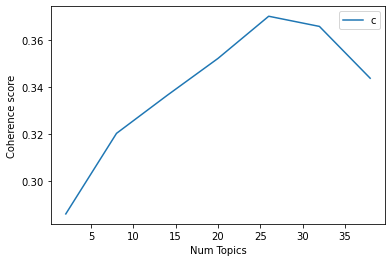

Num Topics = 2  has Coherence Value of 0.286
Num Topics = 8  has Coherence Value of 0.3204
Num Topics = 14  has Coherence Value of 0.3366
Num Topics = 20  has Coherence Value of 0.3523
Num Topics = 26  has Coherence Value of 0.3703
Num Topics = 32  has Coherence Value of 0.366
Num Topics = 38  has Coherence Value of 0.3439
[(0, '0.030*"vaccine" + 0.020*"vaccination" + 0.020*"dose" + 0.019*"mumbai" + 0.017*"amp" + 0.016*"available" + 0.013*"vaccinate" + 0.013*"india" + 0.011*"get" + 0.010*"take"'), (1, '0.045*"vaccine" + 0.024*"dose" + 0.023*"covid" + 0.015*"amp" + 0.015*"vaccines" + 0.014*"effect" + 0.011*"get" + 0.009*"go" + 0.009*"wait" + 0.009*"use"'), (2, '0.043*"vaccine" + 0.039*"dose" + 0.029*"get" + 0.023*"approval" + 0.016*"covid" + 0.015*"jab" + 0.014*"take" + 0.013*"sector" + 0.012*"today" + 0.011*"covaxin"'), (3, '0.016*"approval" + 0.016*"vaccine" + 0.016*"vaccines" + 0.013*"amp" + 0.013*"crore" + 0.010*"dose" + 0.009*"data" + 0.008*"man" + 0.008*"covid" + 0.008*"young"'), 

In [97]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['lemmas'], start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))